In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
ip_df = pd.read_csv('IPL_PLAYERS.csv')
tb_df = pd.read_csv('TOP_BUYS.csv')
un_df = pd.read_csv('UNSOLD_PLAYERS.csv')
ip_df.head()

,PLAYER,OverseasIndian,TYPE,PRICE PAID,Team
0,Daryl Mitchell,Overseas,All-Rounder,"₹14,00,00,000",Chennai Super Kings
1,Sameer Rizvi,Indian,Batter,"₹8,40,00,000",Chennai Super Kings
2,Shardul Thakur,Indian,All-Rounder,"₹4,00,00,000",Chennai Super Kings
3,Mustafizur Rahman,Overseas,Bowler,"₹2,00,00,000",Chennai Super Kings
4,Rachin Ravindra,Overseas,All-Rounder,"₹1,80,00,000",Chennai Super Kings


In [7]:
tb_df.head(5)

,TEAM,PLAYER,TYPE,PRICE PAID
0,Kolkata Knight Riders,Mitchell Starc,Bowler,"₹24,75,00,000"
1,Sunrisers Hyderabad,Pat Cummins,All-Rounder,"₹20,50,00,000"
2,Chennai Super Kings,Daryl Mitchell,All-Rounder,"₹14,00,00,000"
3,Punjab Kings,Harshal Patel,All-Rounder,"₹11,75,00,000"
4,Royal Challengers Bangalore,Alzarri Joseph,Bowler,"₹11,50,00,000"


In [8]:
un_df.head()

,PLAYER,NATIONALITYOverseasIndian,TYPEBatterWicket-KeeperBowlerAll-Rounder,BASE PRICE
0,Steve Smith,Overseas,Batter,"₹2,00,00,000"
1,Josh Inglis,Overseas,Wicket-Keeper,"₹2,00,00,000"
2,Josh Hazlewood,Overseas,Bowler,"₹2,00,00,000"
3,Adil Rashid,Overseas,Bowler,"₹2,00,00,000"
4,Rassie Van Der Dussen,Overseas,Batter,"₹2,00,00,000"


In [9]:
ip_df.isna().sum()

,0
PLAYER,0
OverseasIndian,0
TYPE,0
PRICE PAID,0
Team,0


In [10]:
tb_df.isna().sum()

,0
TEAM,0
PLAYER,0
TYPE,0
PRICE PAID,0


In [11]:
un_df.isna().sum()

,0
PLAYER,0
NATIONALITYOverseasIndian,0
TYPEBatterWicket-KeeperBowlerAll-Rounder,0
BASE PRICE,0


In [12]:
ip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PLAYER          72 non-null     object
 1   OverseasIndian  72 non-null     object
 2   TYPE            72 non-null     object
 3   PRICE PAID      72 non-null     object
 4   Team            72 non-null     object
dtypes: object(5)
memory usage: 2.9+ KB


In [13]:
tb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TEAM        10 non-null     object
 1   PLAYER      10 non-null     object
 2   TYPE        10 non-null     object
 3   PRICE PAID  10 non-null     object
dtypes: object(4)
memory usage: 452.0+ bytes


In [14]:
tb_df['PRICE PAID'] = pd.to_numeric(
    tb_df['PRICE PAID'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False),
    errors='coerce'
).astype('Int64')  # Nullable int
tb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TEAM        10 non-null     object
 1   PLAYER      10 non-null     object
 2   TYPE        10 non-null     object
 3   PRICE PAID  10 non-null     Int64 
dtypes: Int64(1), object(3)
memory usage: 462.0+ bytes


In [17]:
un_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   PLAYER                                    260 non-null    object
 1   NATIONALITYOverseasIndian                 260 non-null    object
 2   TYPEBatterWicket-KeeperBowlerAll-Rounder  260 non-null    object
 3   BASE PRICE                                260 non-null    object
dtypes: object(4)
memory usage: 8.3+ KB


In [20]:
print(ip_df.columns.tolist())

['PLAYER', 'OVERSEASINDIAN', 'TYPE', 'PRICE PAID', 'TEAM']


In [21]:
ip_df.columns = ip_df.columns.str.strip().str.upper()

In [25]:
value_spent = ip_df.groupby("TEAM")["PRICE PAID"].sum().sort_values(ascending=False)
print(value_spent)

TEAM
Rajasthan Royals               ₹7,40,00,000₹5,80,00,000₹50,00,000₹40,00,000₹2...
Delhi Capitals                 ₹7,20,00,000₹5,00,00,000₹4,00,00,000₹1,00,00,0...
Lucknow Super Giants           ₹6,40,00,000₹2,40,00,000₹2,00,00,000₹1,00,00,0...
Mumbai Indians                 ₹5,00,00,000₹4,80,00,000₹4,60,00,000₹1,50,00,0...
Kolkata Knight Riders          ₹24,75,00,000₹2,00,00,000₹1,50,00,000₹1,00,00,...
Sunrisers Hyderabad            ₹20,50,00,000₹6,80,00,000₹1,60,00,000₹1,50,00,...
Chennai Super Kings            ₹14,00,00,000₹8,40,00,000₹4,00,00,000₹2,00,00,...
Punjab Kings                   ₹11,75,00,000₹8,00,00,000₹4,20,00,000₹20,00,00...
Royal Challengers Bangalore    ₹11,50,00,000₹5,00,00,000₹2,00,00,000₹1,50,00,...
Gujarat Titans                 ₹10,00,00,000₹7,40,00,000₹5,80,00,000₹3,60,00,...
Name: PRICE PAID, dtype: object


In [27]:
print(value_spent.dtypes)

object


In [30]:
value_spent = pd.to_numeric(value_spent, errors='coerce')

<Axes: title={'center': 'PRICE SPENT BY TEAMS'}, xlabel='TEAM', ylabel='Price spent'>

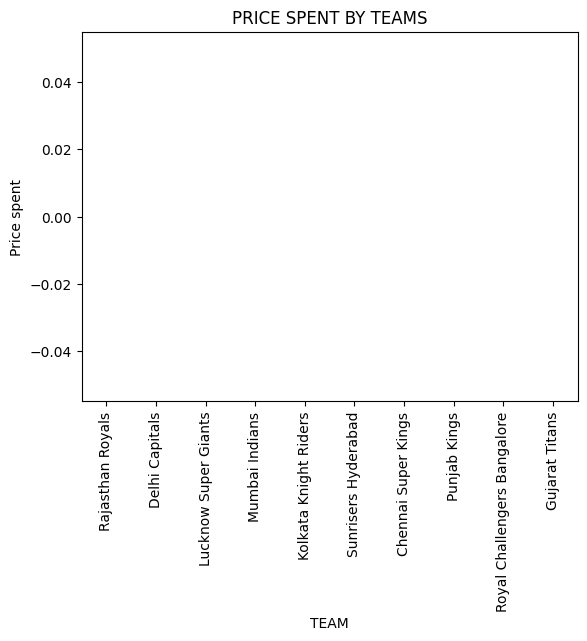

In [35]:
value_spent.plot(kind="bar",ylabel="Price spent",title="PRICE SPENT BY TEAMS")

In [36]:
print(ip_df.columns.tolist())

['PLAYER', 'OVERSEASINDIAN', 'TYPE', 'PRICE PAID', 'TEAM']


In [40]:
wk_sold = ip_df.groupby("TYPE")["PLAYER"].count()
wk_sold

,PLAYER
TYPE,
All-Rounder,25
Batter,13
Bowler,26
Wicket-Keeper,8


<Axes: title={'center': 'Number of players in each type'}, xlabel='Type', ylabel='Number of players'>

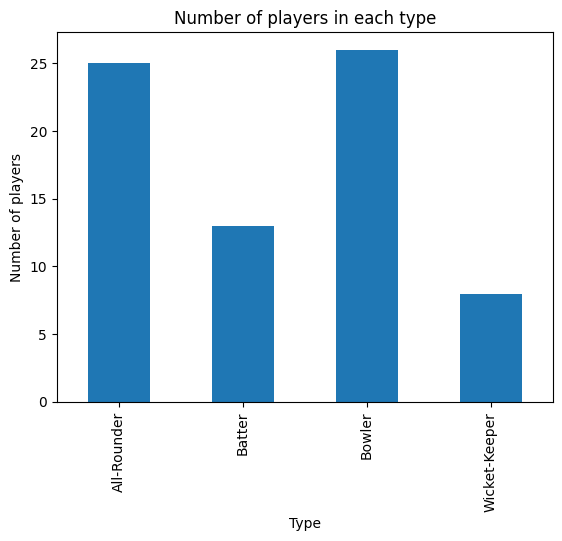

In [44]:
wk_sold.plot(kind="bar",xlabel="Type",ylabel="Number of players",title="Number of players in each type")

In [52]:
print(un_df.columns.tolist())

['PLAYER', 'NATIONALITYOVERSEASINDIAN', 'TYPEBATTERWICKET-KEEPERBOWLERALL-ROUNDER', 'BASE PRICE']


In [51]:
un_df.columns = un_df.columns.str.strip().str.upper()
print(un_df.columns.tolist())  # Check what NATIONALITY is now called

['PLAYER', 'NATIONALITYOVERSEASINDIAN', 'TYPEBATTERWICKET-KEEPERBOWLERALL-ROUNDER', 'BASE PRICE']


In [53]:
unsold_nat = un_df.groupby("NATIONALITYOVERSEASINDIAN")["PLAYER"].count()
print(unsold_nat)

NATIONALITYOVERSEASINDIAN
Indian      174
Overseas     86
Name: PLAYER, dtype: int64


In [54]:
tb_df

,TEAM,PLAYER,TYPE,PRICE PAID
0,Kolkata Knight Riders,Mitchell Starc,Bowler,247500000
1,Sunrisers Hyderabad,Pat Cummins,All-Rounder,205000000
2,Chennai Super Kings,Daryl Mitchell,All-Rounder,140000000
3,Punjab Kings,Harshal Patel,All-Rounder,117500000
4,Royal Challengers Bangalore,Alzarri Joseph,Bowler,115000000
5,Gujarat Titans,Spencer Johnson,Bowler,100000000
6,Chennai Super Kings,Sameer Rizvi,Batter,84000000
7,Punjab Kings,Rilee Rossouw,Batter,80000000
8,Gujarat Titans,Shahrukh Khan,All-Rounder,74000000
9,Rajasthan Royals,Rovman Powell,Batter,74000000


<Axes: title={'center': 'TOP BUY'}, xlabel='PLAYER'>

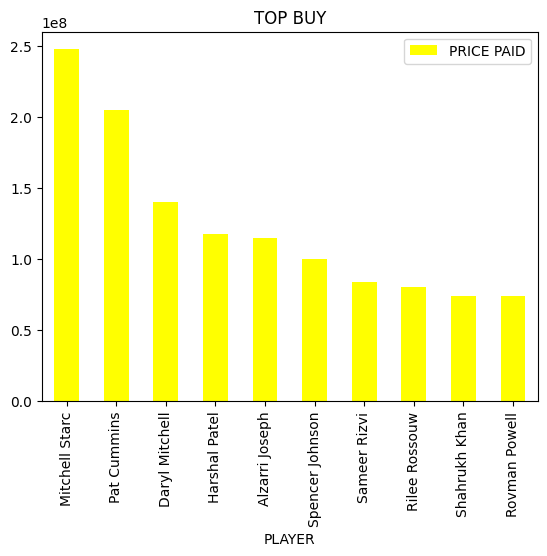

In [59]:
tb_df.plot(kind="bar",x="PLAYER",y="PRICE PAID",title="TOP BUY",color="yellow")

In [60]:
print(ip_df.columns.tolist())

['PLAYER', 'OVERSEASINDIAN', 'TYPE', 'PRICE PAID', 'TEAM']


In [66]:
value_spent_by_nationality = ip_df.groupby("OVERSEASINDIAN")["PRICE PAID"].sum()
value_spent_by_nationality.sort_values(ascending = False)

,PRICE PAID
OVERSEASINDIAN,
Indian,"₹8,40,00,000₹4,00,00,000₹20,00,000₹7,20,00,000..."
Overseas,"₹14,00,00,000₹2,00,00,000₹1,80,00,000₹5,00,00,..."


In [67]:
print(value_spent_by_nationality)
print(value_spent_by_nationality.dtypes)

OVERSEASINDIAN
Indian      ₹8,40,00,000₹4,00,00,000₹20,00,000₹7,20,00,000...
Overseas    ₹14,00,00,000₹2,00,00,000₹1,80,00,000₹5,00,00,...
Name: PRICE PAID, dtype: object
object


In [68]:
ip_df["PRICE PAID"] = pd.to_numeric(ip_df["PRICE PAID"], errors='coerce')

In [72]:
value_spent_by_nationality = ip_df.groupby("OVERSEASINDIAN")["PRICE PAID"].sum()

In [75]:
value_spent_by_nationality = value_spent_by_nationality.dropna()

In [88]:
# Remove ₹ and commas and convert to numeric
ip_df["PRICE PAID"] = (
    ip_df["PRICE PAID"]
    .astype(str)
    .str.replace("₹", "", regex=False)
    .str.replace(",", "", regex=False)
)

# Convert to numeric (NaNs will be created if there are bad values)
ip_df["PRICE PAID"] = pd.to_numeric(ip_df["PRICE PAID"], errors="coerce")

In [89]:
print(ip_df.columns)

Index(['PLAYER', 'OVERSEASINDIAN', 'TYPE', 'PRICE PAID', 'TEAM'], dtype='object')


In [90]:
# Strip extra spaces and uppercase all column names
ip_df.columns = ip_df.columns.str.strip().str.upper()

In [91]:
print(value_spent_by_nationality)

OVERSEASINDIAN
Indian      0.0
Overseas    0.0
Name: PRICE PAID, dtype: float64


In [95]:
value_spent_by_nationality = (
    ip_df.groupby("OVERSEASINDIAN")["PRICE PAID"]
    .sum()
    .dropna()
    .sort_values(ascending=False)
)

In [96]:
print(ip_df[["PRICE PAID", "OVERSEASINDIAN"]].head())
print(ip_df["PRICE PAID"].dtype)
print(ip_df["OVERSEASINDIAN"].isnull().sum())
print(ip_df["PRICE PAID"].isnull().sum())

   PRICE PAID OVERSEASINDIAN
0         NaN       Overseas
1         NaN         Indian
2         NaN         Indian
3         NaN       Overseas
4         NaN       Overseas
float64
0
72


<Axes: title={'center': 'Budget Distribution by Nationality'}, ylabel='PRICE PAID'>

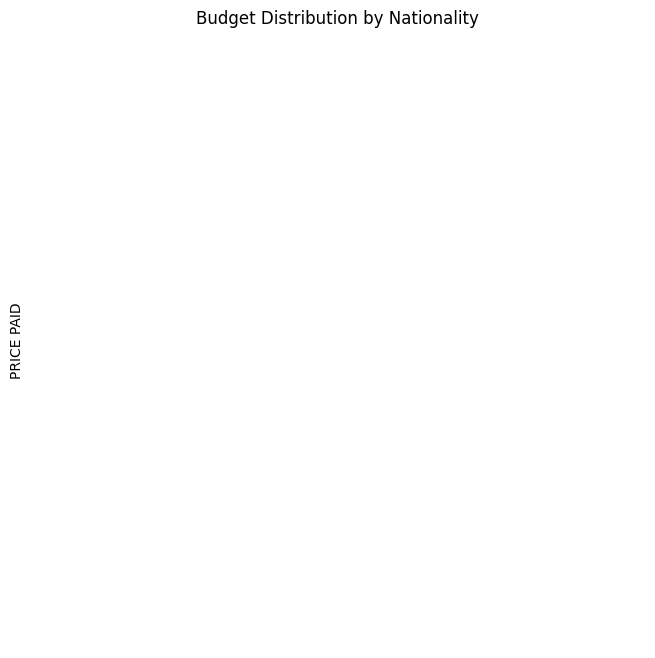

In [102]:
# 1. Clean column names
ip_df.columns = ip_df.columns.str.strip().str.upper()

# 2. Clean "PRICE PAID" column (remove ₹ and commas, convert to numeric)
ip_df["PRICE PAID"] = (
    ip_df["PRICE PAID"]
    .astype(str)
    .str.replace("₹", "", regex=False)
    .str.replace(",", "", regex=False)
)
ip_df["PRICE PAID"] = pd.to_numeric(ip_df["PRICE PAID"], errors="coerce")

# 3. Group and drop NaNs
value_spent_by_nationality = (
    ip_df.groupby("OVERSEASINDIAN")["PRICE PAID"]
    .sum()
    .dropna()
    .sort_values(ascending=False)
)

# 4. Drop entries with 0 or NaN
value_spent_by_nationality = value_spent_by_nationality[value_spent_by_nationality > 0]

# 5. Plot pie chart (NO x or y needed)
value_spent_by_nationality.plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(8, 8),
    title="Budget Distribution by Nationality"
)


In [98]:
Sold_player = ip_df["PLAYER"].count()
unsold_player=un_df["PLAYER"].count()

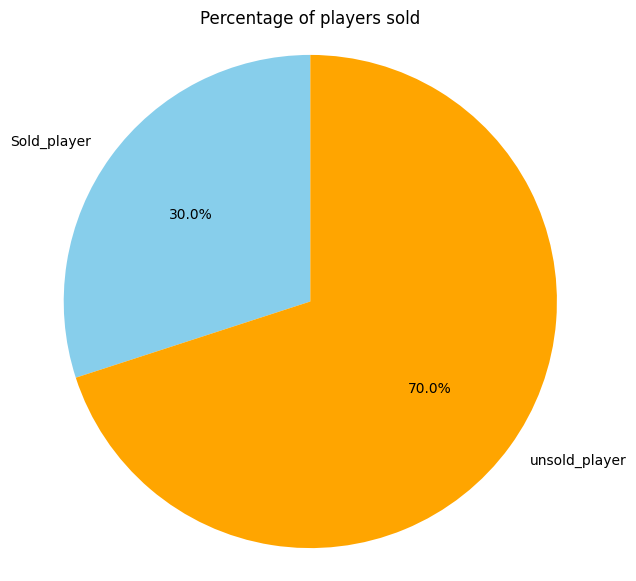

In [99]:
import matplotlib.pyplot as plt

labels = ['Sold_player', 'unsold_player']
sizes = [30, 70]

colors = ['skyblue', 'orange']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')

plt.title('Percentage of players sold')

plt.show()